# AAL Q4 2023 Sales Analysis

**Introduction:**

(a) Background: AAL, established in 2000, is a leading Australian clothing brand with a nationwide presence. The company is currently experiencing growth and seeking opportunities for further expansion.

(b) Objective: This analysis focuses on AAL's Q4 2023 sales data, broken down by state, time of day, and Customer Group. The objective is to identify high and low-performing states and develop data-driven sales programs to improve overall performance.

(c) Data Description: The analysis utilizes sales data from AAL for Q4 2023, provided by Simplilearn.com. The key variables include Date, Time, State, Group, Units, and Sales. A limitation of this analysis is that it is based on a single quarter's data, and may not reflect annual trends.

(d)Methodology: The data was cleaned and preprocessed using Python with Pandas. Sales were aggregated by state, time, and Group. Visualizations were created using Matplotlib and Seaborn in Python.


## Importing libraries and Loading dataset

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path=r'C:\Users\LENOVO\OneDrive\Documents\Code Playground\Australia Sales Analysis project\Dataset\AusApparalSales4thQrt2020.csv'
df=pd.read_csv(path)
print(df.head(),"\n\n")
print(df.info())

         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None


## Data Cleaning

Using pandas methods to check for missing values in the datset.


In [160]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

# Exploratory Data Analysis (EDA)

## State-wise Revenue Analysis

The following table and bar chart show the total revenue generated by each state during Q4 2023.

State
VIC    105565000
NSW     74970000
SA      58857500
QLD     33417500
TAS     22760000
NT      22580000
WA      22152500
Name: Sales, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10844\2966790645.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_revenue.index, y=state_revenue.values, palette='viridis')


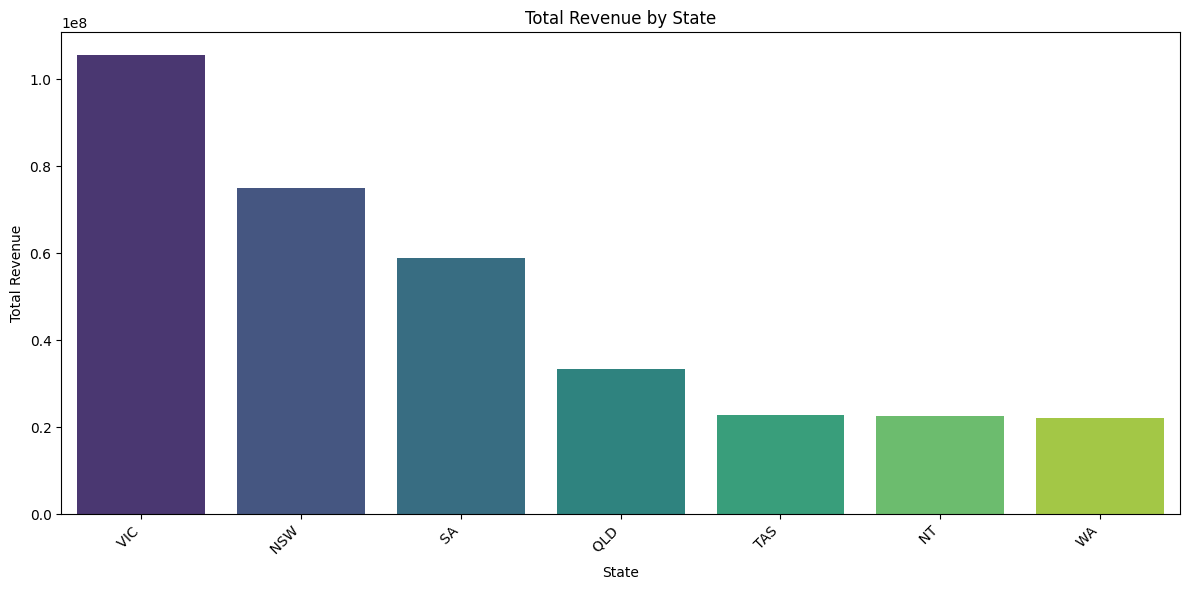

In [161]:

state_revenue = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
print(state_revenue)
plt.figure(figsize=(12, 6))
sns.barplot(x=state_revenue.index, y=state_revenue.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Total Revenue by State')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


'VIC' and 'NSW' were the top-performing states.

'NT' and 'WA' were the lowest-performing states.


## Time of Day Analysis

The following pie chart shows the distribution of sales by time of day.

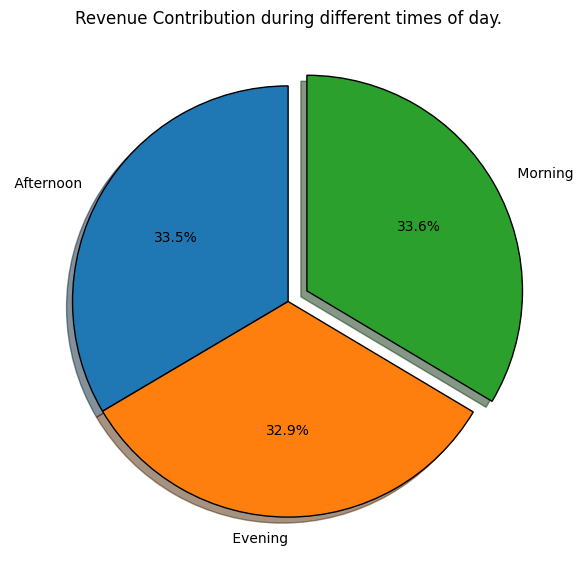

In [162]:
# Sales by time of day
sales_by_time = df.groupby('Time')['Sales'].sum()
# Pie chart of top-performing states with explode and sharper borders
plt.figure(figsize=(8, 7))

# Explode the slice with the maximum value
explode = [0] * len(sales_by_time)  # Initialize explode list with zeros
max_index = sales_by_time.idxmax() #Find the index of the max value
explode[sales_by_time.index.get_loc(max_index)] = 0.1  # Set explode value for the max slice

#Improved border with wedgeprops
wedgeprops = {"linewidth": 1, "edgecolor": "black"} #Set line width and color

sales_by_time.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap=None, explode=explode, wedgeprops=wedgeprops, shadow=True)

plt.title('Revenue Contribution during different times of day.')
plt.ylabel('')
plt.show()

'Morning' seems to be the time when most sales occur.

## Sales by State and Group Analysis

The follwing Bar graph shows total revenue generated by each state and how much each Customer Group contributed. 

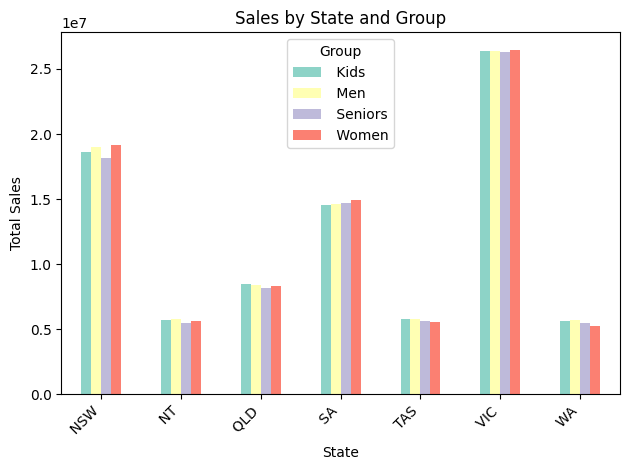

In [163]:
# Sales by customer group within each state
sales_by_state_group = df.groupby(['State', 'Group'])['Sales'].sum()
# Bar chart of sales by state and group
num_groups = len(sales_by_state_group.unstack().columns)

# Choose a seaborn palette (examples: 'viridis', 'plasma', 'magma', 'Set3', 'Paired', 'tab10', 'husl')
palette = sns.color_palette("Set3", n_colors=num_groups)  # Get the color palette

sales_by_state_group.unstack().plot(kind='bar', color=palette)  # Use the palette
plt.title('Sales by State and Group')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

'Women' are the most frequent customer group in the highest revenue generating states, 'NSW' and 'VIC'.

## Sales over Months Analysis

The following line chart shows the trend of sales throughout the months of Q4 2023, i.e. October, November, December.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10844\1523945121.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_over_time_monthly = df.groupby(pd.Grouper(key='Date', freq='M'))['Sales'].sum()


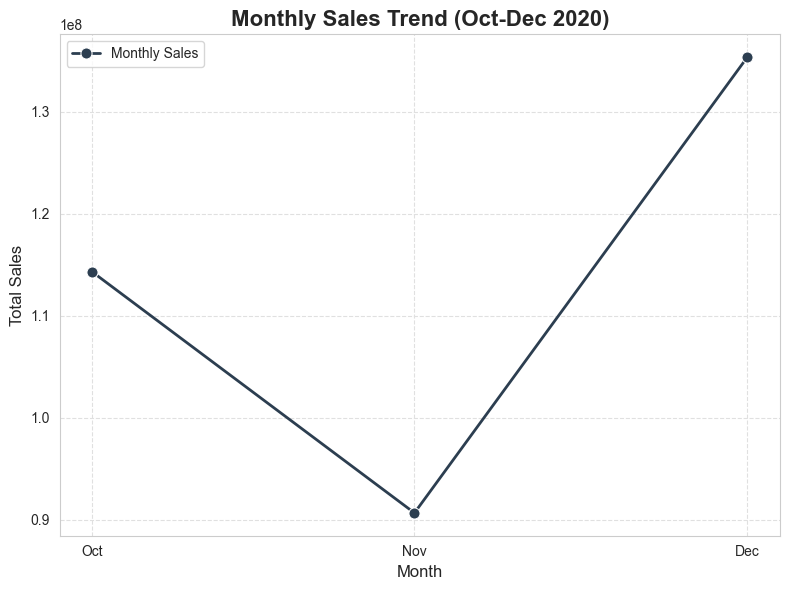

In [184]:
sales_over_time_monthly = df.groupby(pd.Grouper(key='Date', freq='M'))['Sales'].sum()

# Standard theme with shadow
plt.figure(figsize=(8, 6))

# Use seaborn styling for a better look (optional)
sns.set_style("whitegrid")  # Or "white", "darkgrid", "ticks"

# Plot the line chart with styling and shadow
ax = sns.lineplot(x=sales_over_time_monthly.index, y=sales_over_time_monthly.values, 
                 marker='o', color='#2c3e50', linewidth=2, markersize=8, label='Monthly Sales') # Dark blue color

# Customize the plot
plt.title('Monthly Sales Trend (Oct-Dec 2020)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(sales_over_time_monthly.index, [d.strftime('%b') for d in sales_over_time_monthly.index], fontsize=10)
plt.yticks(fontsize=10)

# Customize grid lines (optional)
ax.grid(color='#e0e0e0', linestyle='--')  # Light gray, dashed grid

# Add a legend
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

'November' seems to be the least profitable month. Meanwhile, the sales spike rapidly as 'December' approches.

# Recommendation

Based on the analysis, the following recommendations are proposed:



**For Low-Performing States:**

* Explore partnerships or collaborations in 'NT' and 'WA' to expand market reach.
* Optimize product availability and distribution in 'NT' and 'WA'.


**For High-Performing States:**

* Leverage the success in 'VIC' and 'NSW' to expand into new markets or introduce new product lines.

**General Recommendations:**

* Focus on 'Women' and 'Kids' Customer Groups.
* Since the sales opportunity is maximum during 'Morning' time of day, try to increase product variety for early customers.

# Conclusion

**This analysis of AAL's Q4 2023 sales data has revealed valuable insights into state-wise performance, time-of-day trends, and Customer Group-wise performance. By implementing the recommendations outlined in this report, AAL can optimize its sales strategies, improve performance in low-performing states, and capitalize on opportunities in high-performing states, ultimately driving revenue growth and achieving its expansion objectives.**